# Benchmarking Metrics

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Runs on different size reference genome

In [14]:
# Generate Multiple Reference Genomes
!rm -rf ref_sizes
!mkdir ref_sizes
for i in range(40):

    outr = open(f"ref_sizes/reference{i}.fa", "w")
    outr.write(f">chr{i}\n")
    reference = ""
    for _ in range(i*5000):
        reference += np.random.choice(["A","T","C","G"])
    outr.write(reference)
    outr.close()

In [15]:
# Generate Single fastq file
len_reads = 10
outr = open(f"ref_sizes/fq.fastq", "w")
for i in range(200):
    if i % 4 == 0:
        outr.write(f"@{i//4}\n")
    if i % 4 == 1:
        read = ""
        for _ in range(len_reads):
            read += np.random.choice(["A","T","C","G"]) 
        outr.write(read+"\n")
    if i % 4 == 2:
        outr.write("+\n")
    if i % 4 == 3:
        outr.write("F"*len_reads+"\n")
outr.close()

In [49]:
%%bash
# Run each reference with fastq
for var in 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
do
    REF=${var}
    READS=ref_sizes/fq.fastq
    APATH=$"ref_sizes/"$var
    wf-align ref_sizes/reference$REF.fa $READS -o "$APATH".sam -m "$APATH".txt
done

/Users/willardwashingtonford/mambaforge/bin:/Users/willardwashingtonford/mambaforge/condabin:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/appleinternal/bin:/Users/willardwashingtonford/.cargo/bin
/Users/willardwashingtonford/mambaforge/bin/python


In [55]:
%%bash
# Collect metrics for each run
rm ref_sizes/ref_sizes_time.txt
touch ref_sizes/ref_sizes_time.txt

echo time_taken >> ref_sizes/ref_sizes_time.txt

for var in 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
do
    APATH=$"ref_sizes/"$var
    cat "$APATH".txt | grep "Total Time:" | cut -f2 >> ref_sizes/ref_sizes_time.txt
done

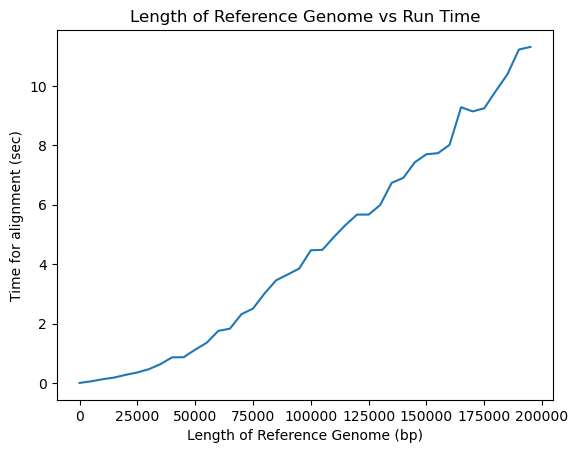

In [56]:
# Plot metrics by run
lengths = []
for i in range(40):
    lengths.append(i*5000)
data = pd.read_csv("ref_sizes/ref_sizes_time.txt")

data["lengths"] = lengths
data.head()

plt.plot(data["lengths"], data["time_taken"])
plt.title("Length of Reference Genome vs Run Time")
plt.xlabel("Length of Reference Genome (bp)")
plt.ylabel("Time for alignment (sec)")
plt.savefig("Varying_Reference_Length.jpg")

## Runs on different size total reads

In [73]:
# Generate a single Reference Genome
!rm -rf read_sizes
!mkdir read_sizes

ref_len = 20000

outr = open(f"read_sizes/reference.fa", "w")
outr.write(f">chr1\n")
reference = ""
for _ in range(ref_len):
    reference += np.random.choice(["A","T","C","G"])
outr.write(reference)
outr.close()

In [82]:
# Generate many fastq files with varying sizes
len_reads = 10
dif_reads_per = 50

for i in range(40):
    outr = open(f"read_sizes/fq{i}.fastq", "w")
    for i in range(i*dif_reads_per):
        if i % 4 == 0:
            outr.write(f"@{i//4}\n")
        if i % 4 == 1:
            read = ""
            for _ in range(len_reads):
                read += np.random.choice(["A","T","C","G"]) 
            outr.write(read+"\n")
        if i % 4 == 2:
            outr.write("+\n")
        if i % 4 == 3:
            outr.write("F"*len_reads+"\n")
    outr.close()

In [83]:
%%bash
# Run each fastq with reference
for var in 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
do
    REF=read_sizes/reference.fa
    FQ=$"read_sizes/fq"$var
    APATH=$"read_sizes/"$var
    wf-align $REF "$FQ".fastq -o "$APATH".sam -m "$APATH".txt
done

In [84]:
%%bash
# Collect metrics for each run
LOC="read_sizes/read_sizes_time.txt"
rm $LOC
touch $LOC

echo time_taken >> $LOC

APATH=$"read_sizes/"$var
for var in 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
do
    APATH=$"read_sizes/"$var
    cat "$APATH".txt | grep "Total Time:" | cut -f2 >> $LOC
done

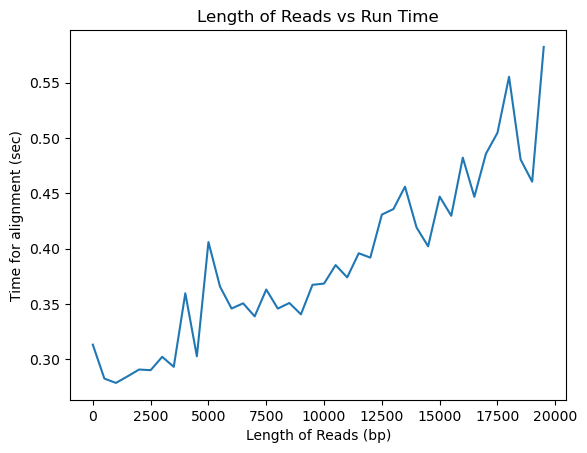

In [85]:
# Plot metrics by run
lengths = []
for i in range(40):
    lengths.append(i*(len_reads*dif_reads_per))
data = pd.read_csv("read_sizes/read_sizes_time.txt")

data["lengths"] = lengths
data.head()

plt.plot(data["lengths"], data["time_taken"])
plt.title("Length of Reads vs Run Time")
plt.xlabel("Length of Reads (bp)")
plt.ylabel("Time for alignment (sec)")
plt.savefig("Varying_Read_Length.jpg")

## Runs w/ different size total reads and different size reference genome

In [65]:
# Generate Multiple Reference Genomes
#FOLDER="ref_read_sizes"
!rm -rf ref_read_sizes
!mkdir ref_read_sizes

for i in range(40):
    outr = open(f"ref_read_sizes/{i}.fa", "w")
    outr.write(f">chr{i}\n")
    reference = ""
    for _ in range(i*5000):
        reference += np.random.choice(["A","T","C","G"])
    outr.write(reference)
    outr.close()

In [66]:
# Generate many fastq files with varying sizes
len_reads = 10
dif_reads_per = 50

for i in range(40):
    outr = open(f"ref_read_sizes/{i}.fq", "w")
    for i in range(i*dif_reads_per):
        if i % 4 == 0:
            outr.write(f"@{i//4}\n")
        if i % 4 == 1:
            read = ""
            for _ in range(len_reads):
                read += np.random.choice(["A","T","C","G"]) 
            outr.write(read+"\n")
        if i % 4 == 2:
            outr.write("+\n")
        if i % 4 == 3:
            outr.write("F"*len_reads+"\n")
    outr.close()

In [68]:
%%bash
# Run each fastq with reference
for var in 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
do
    APATH=$"ref_read_sizes/"$var
    wf-align "$APATH".fa "$APATH".fq -o "$APATH".sam -m "$APATH".txt
done

In [69]:
%%bash
# Collect metrics for each run
LOC="ref_read_sizes/ref_read_sizes_time.txt"
rm $LOC
touch $LOC

echo time_taken >> $LOC

APATH=$"ref_read_sizes/"$var
for var in 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
do
    APATH=$"ref_read_sizes/"$var
    cat "$APATH".txt | grep "Total Time:" | cut -f2 >> $LOC
done

rm: ref_read_sizes/ref_read_sizes_time.txt: No such file or directory


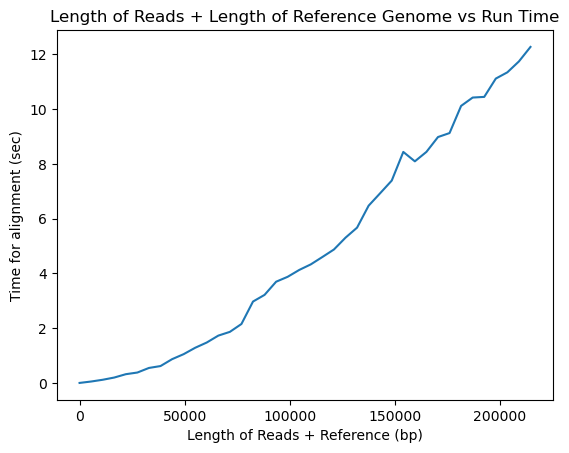

In [87]:
# Plot metrics by run
lengths = []
for i in range(40):
    lengths.append(i*(len_reads*dif_reads_per)+i*5000)
data = pd.read_csv("ref_read_sizes/ref_read_sizes_time.txt")

data["lengths"] = lengths
data.head()

plt.plot(data["lengths"], data["time_taken"])
plt.title("Length of Reads + Length of Reference Genome vs Run Time")
plt.xlabel("Length of Reads + Reference (bp)")
plt.ylabel("Time for alignment (sec)")
plt.savefig("Varying_Ref_Read_Length.jpg")